In [1]:
## imports
import pandas as pd
import numpy as np
from numpy import loadtxt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# Load the CSV dataset into a pandas dataframe
df = pd.read_csv('data_processed_10_v5.csv')

In [8]:
df.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,...,neighbourhood_1,neighbourhood_2,neighbourhood_3,neighbourhood_4,neighbourhood_5,neighbourhood_6,neighbourhood_7,neighbourhood_8,neighbourhood_9,neighbourhood_10
0,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Harlem,40.80902,-73.94190,150,3,0,0.00,1,365,0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
df = df.drop('neighbourhood', axis = 1)

In [22]:
### colonnes dataframe
list(df)

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'neighbourhood_group_Bronx',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island',
 'neighbourhood_1',
 'neighbourhood_2',
 'neighbourhood_3',
 'neighbourhood_4',
 'neighbourhood_5',
 'neighbourhood_6',
 'neighbourhood_7',
 'neighbourhood_8',
 'neighbourhood_9',
 'neighbourhood_10']

In [23]:
print('number of rows in the df:',len(df))
df.describe()

number of rows in the df: 47447


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,...,neighbourhood_1,neighbourhood_2,neighbourhood_3,neighbourhood_4,neighbourhood_5,neighbourhood_6,neighbourhood_7,neighbourhood_8,neighbourhood_9,neighbourhood_10
count,47447.000000,47447.000000,47447.000000,47447.000000,47447.000000,47447.000000,47447.000000,47447.000000,47447.000000,47447.000000,...,47447.000000,47447.000000,47447.000000,47447.000000,47447.000000,47447.000000,47447.000000,47447.000000,47447.000000,47447.000000
mean,40.728764,-73.951464,128.571775,6.976732,23.620060,1.100821,6.983181,110.724408,0.022762,0.416802,...,-0.007398,-0.094421,0.069699,0.005501,0.109659,0.151811,-0.002635,-0.013152,0.084052,0.017430
std,0.054909,0.046287,82.026077,20.372370,44.926398,1.605190,32.319389,130.816615,0.149146,0.493035,...,0.344607,0.333182,0.320067,0.338285,0.314619,0.394219,0.229761,0.213357,0.328718,0.190099
min,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,40.689710,-73.982470,68.000000,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.722450,-73.955030,100.000000,2.000000,5.000000,0.380000,1.000000,42.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.763315,-73.935315,170.000000,5.000000,24.000000,1.610000,2.000000,220.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40.913060,-73.712990,452.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([ 7007., 14117., 10012.,  6630.,  4248.,  2306.,  1360.,   808.,
          640.,   319.]),
 array([ 10. ,  54.2,  98.4, 142.6, 186.8, 231. , 275.2, 319.4, 363.6,
        407.8, 452. ]),
 <BarContainer object of 10 artists>)

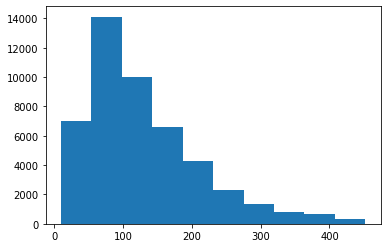

In [24]:
plt.hist(df['price'])

In [25]:
X=df.drop('price', axis=1)
y=df['price']

In [26]:
#train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
rf = RandomForestRegressor(n_estimators=400, max_depth = 50, min_samples_split = 4,min_samples_leaf =5,max_features='sqrt',bootstrap=True, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=4, n_estimators=400, random_state=42)

In [28]:
y_pred=rf.predict(X_test)

In [29]:
### contamination = 'auro' 12% outliers 37 rmse et 0.58 r2
## cont = 0.03 54 et 0.55
## marina 63 et 0.52

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 47.88781725863601
Mean Squared Error: 4351.742219373449
Root Mean Squared Error: 65.96773620015658


In [30]:
from sklearn.metrics import r2_score 
r2_score(y_test.values.ravel(), y_pred)

0.34873433886095073

In [31]:
rf_importances=rf.feature_importances_

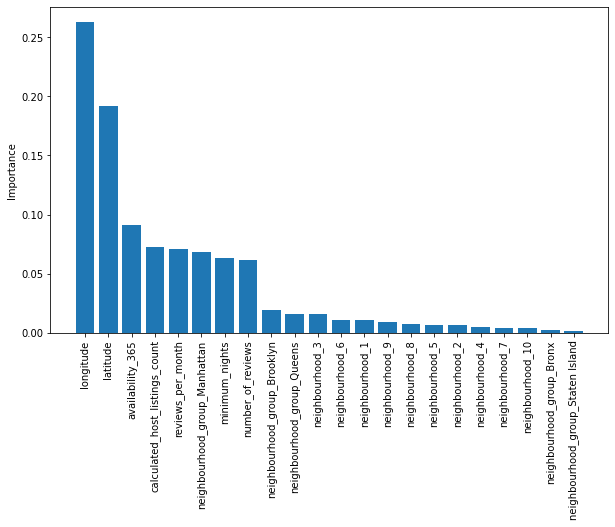

Top features: ['longitude', 'latitude', 'availability_365', 'calculated_host_listings_count', 'reviews_per_month', 'neighbourhood_group_Manhattan', 'minimum_nights']


In [32]:
# Créer un dataframe pour stocker les importances
df_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_importances})

# Trier les importances par ordre décroissant
df_importances = df_importances.sort_values('importance', ascending=False).reset_index(drop=True)

# Afficher les importances sous forme de graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(df_importances['feature'], df_importances['importance'])
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.show()

# Sélectionner les variables les plus importantes (par exemple, les 5 premières)
top_features = df_importances['feature'][:7].tolist()
print('Top features:', top_features)